In [1]:
import sqlite3
import time
import datetime
import random
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import SQLite3_functions

In [2]:

# Spécifier le nom de la base de données créée au préalable dans PgAdmin
nom_bdd = "pollution_plo.db"


# Fonction conn appelle la fonction ouvrir_connexion du fichier annexe Python
conn = sqlite3.connect(nom_bdd)

curs = conn.cursor()

In [3]:
# Fonction permettant d'exécuter un requête SQL sur une BDD définie par sa connexion conn
def executer_requete(requete_sql, conn):
    try:
        cursor = conn.cursor()
        cursor.execute(requete_sql)
        conn.commit()
    except sqlite3.Error as e:
        print("Erreur lors de l'execution de la requête")
        print(e)
        return
    cursor.close()

In [4]:
sql_lire_mesures = """
    SELECT *
    FROM mesures_journalieres;
"""

In [5]:
data = pd.read_sql_query(sql_lire_mesures, conn)

In [6]:
data.head()

,code_station,polluant,valeur,unite,date,Année,Mois,statut_valid
0,120,PM10,15.0,microg/m3,2019-12-01,2019,12,1
1,120,PM10,11.0,microg/m3,2019-12-02,2019,12,1
2,120,PM10,21.0,microg/m3,2019-12-03,2019,12,1
3,120,PM10,30.0,microg/m3,2019-12-04,2019,12,1
4,120,PM10,28.0,microg/m3,2019-12-05,2019,12,1


In [7]:
Periode_conf_NO2 = """
    SELECT * 
    FROM mesures_journalieres
    LEFT JOIN localisation L
        ON mesures_journalieres.code_station = L.code_station
    WHERE Mois BETWEEN '3' AND '4' AND statut_valid = 1 AND polluant = 'NO2';
"""

In [8]:
Periode_conf_NO2 = pd.read_sql_query(Periode_conf_NO2, conn)

In [9]:
NO2_Moyenne_Mensuelle = """SELECT MS.code_station AS CS, nom_station, Mois, Année, AVG(valeur) AS Moyenne_Mensuelle
FROM mesures_journalieres MS
LEFT JOIN localisation L
ON CS = L.code_station 
WHERE Mois BETWEEN '3' AND '4' AND statut_valid = 1 AND polluant = 'NO2'
GROUP BY Mois, CS;
"""

In [10]:
NO2_Moyenne_Mensuelle = pd.read_sql_query(NO2_Moyenne_Mensuelle, conn)

In [11]:
NO2_Moyenne_Mensuelle_2019 = """SELECT MS.code_station AS CS, nom_station, Mois, Année, AVG(valeur) AS Moyenne_Mensuelle
FROM mesures_journalieres MS
LEFT JOIN localisation L
ON CS = L.code_station 
WHERE Mois BETWEEN '3' AND '4' AND statut_valid = 1 AND polluant = 'NO2' AND Année = '2019'
GROUP BY Mois, CS;
"""

In [12]:
NO2_Moyenne_Mensuelle_2019 = pd.read_sql_query(NO2_Moyenne_Mensuelle_2019, conn)

In [13]:
NO2_Moyenne_Mensuelle_2019.head()

,CS,nom_station,Mois,Année,Moyenne_Mensuelle
0,1,Ampère,3,2019,8.259259
1,3,Mégretais,3,2019,8.161290
2,46,Bossènes,3,2019,6.677419
3,68,Frossay,3,2019,4.612903
4,70,St-Etienne de Montluc,3,2019,4.580645


In [14]:
NO2_Moyenne_Mensuelle_2020 = """SELECT MS.code_station AS CS, nom_station, Mois, Année, AVG(valeur) AS Moyenne_Mensuelle
FROM mesures_journalieres MS
LEFT JOIN localisation L
ON CS = L.code_station 
WHERE Mois BETWEEN '3' AND '4' AND statut_valid = 1 AND polluant = 'NO2' AND Année = '2020'
GROUP BY Mois, CS;
"""

In [15]:
NO2_Moyenne_Mensuelle_2020 = pd.read_sql_query(NO2_Moyenne_Mensuelle_2020, conn)

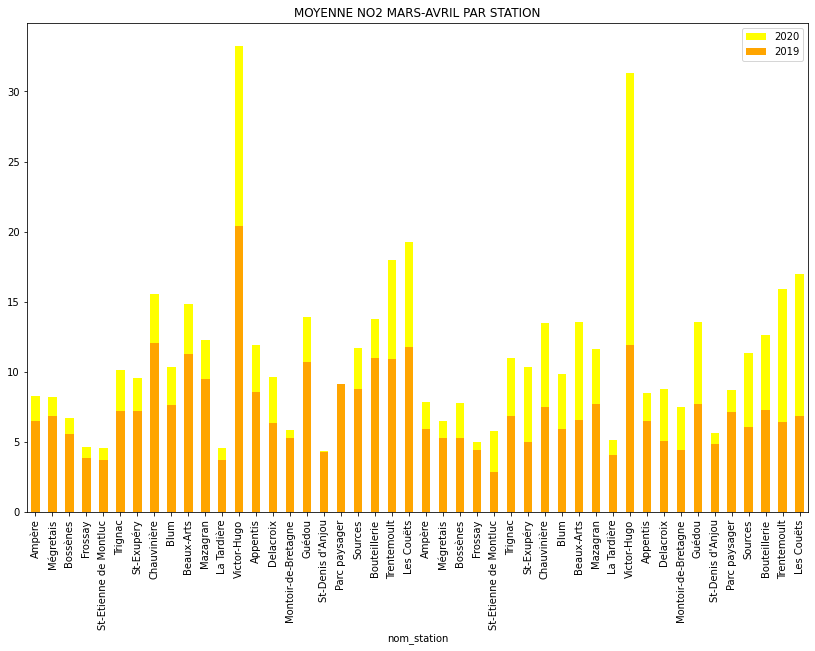

In [16]:
plt.figure(figsize = [14,9])
plt.title("MOYENNE NO2 MARS-AVRIL PAR STATION")
ax = plt.gca()
NO2_Moyenne_Mensuelle_2019.plot(kind='bar',x='nom_station',y='Moyenne_Mensuelle', color='yellow', label='Moyenne 2019', ax=ax)
NO2_Moyenne_Mensuelle_2020.plot(kind='bar',x='nom_station',y='Moyenne_Mensuelle', color='orange', label='Moyenne 2020',ax=ax)
ax.legend(['2020', '2019'])
plt.show()

In [17]:
NO2_Seuil_2019 = """SELECT MS.code_station AS CS, nom_station, date, Mois, Année, MAX(valeur) as valeur
FROM mesures_journalieres MS
LEFT JOIN localisation L
ON CS = L.code_station 
WHERE date BETWEEN '2019-03-17' AND '2019-05-11' AND statut_valid = 1 AND polluant = 'NO2'
GROUP BY Mois, CS;
"""

In [18]:
NO2_Seuil_2019 = pd.read_sql_query(NO2_Seuil_2019, conn)

In [19]:
NO2_Seuil_2019.head(2)

,CS,nom_station,date,Mois,Année,valeur
0,1,Ampère,2019-03-22,3,2019,19.0
1,3,Mégretais,2019-03-22,3,2019,24.0


In [20]:
NO2_Seuil_2020 = """SELECT MS.code_station AS CS, nom_station, Mois, Année, MAX(valeur) as valeur
FROM mesures_journalieres MS
LEFT JOIN localisation L
ON CS = L.code_station 
WHERE date BETWEEN '2020-03-17' AND '2020-05-11' AND statut_valid = 1 AND polluant = 'NO2'
GROUP BY Mois, CS;
"""

In [21]:
NO2_Seuil_2020 = pd.read_sql_query(NO2_Seuil_2020, conn)

In [22]:
NO2_Seuil_2020.head(2)

,CS,nom_station,Mois,Année,valeur
0,1,Ampère,3,2020,10.0
1,3,Mégretais,3,2020,11.0


In [23]:
NO2_Seuil_2021 = """SELECT MS.code_station AS CS, nom_station, Mois, Année, MAX(valeur) as valeur
FROM mesures_journalieres MS
LEFT JOIN localisation L
ON CS = L.code_station 
WHERE date BETWEEN '2021-03-11' AND '2021-05-17' AND statut_valid = 1 AND polluant = 'NO2'
GROUP BY Mois, CS;
"""

In [24]:
NO2_Seuil_2021 = pd.read_sql_query(NO2_Seuil_2021, conn)

In [25]:
NO2_Seuil_2021.head(2)

,CS,nom_station,Mois,Année,valeur
0,1,Ampère,3,2021,9.0
1,3,Mégretais,3,2021,15.0


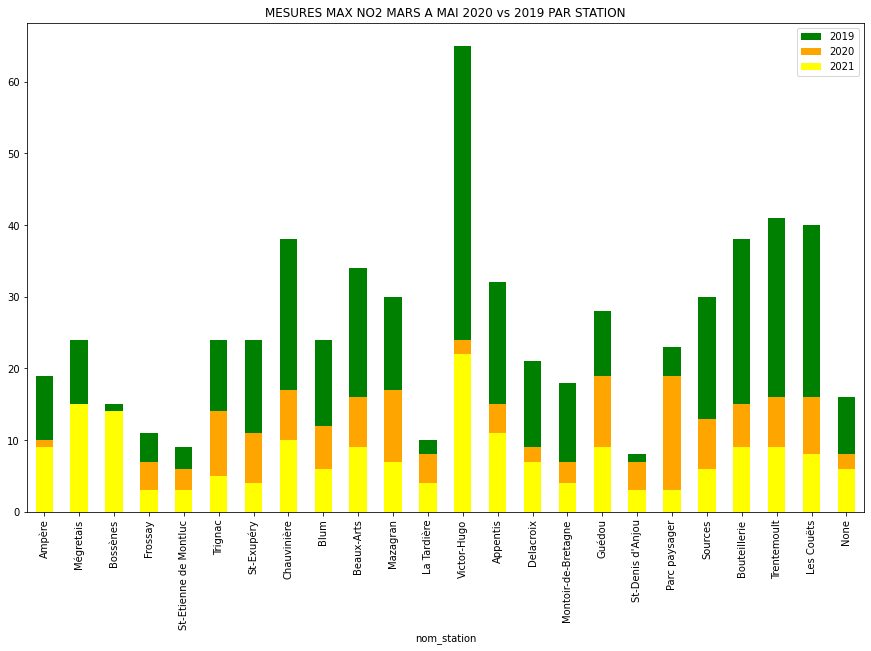

In [26]:
plt.figure(figsize = [15,9])
plt.title("MESURES MAX NO2 MARS A MAI 2020 vs 2019 PAR STATION")
ax = plt.gca()
NO2_Seuil_2019.plot(kind='bar',x='nom_station',y='valeur', color='green', ax=ax)
NO2_Seuil_2020.plot(kind='bar',x='nom_station',y='valeur', color='orange', ax=ax)
NO2_Seuil_2021.plot(kind='bar',x='nom_station',y='valeur', color='yellow', ax=ax)
ax.legend(['2019','2020', '2021'])
fig = ax.get_figure()
fig.savefig("MESURES_MAX_NO2_MARS_A_MAI_2020_vs_2019_PAR_STATION.png")
plt.show()

In [27]:
df_pivot = pd.pivot_table(
    NO2_Seuil_2019, 
    values="valeur",
    index="nom_station",
    columns="Année", 
    aggfunc=np.mean
)

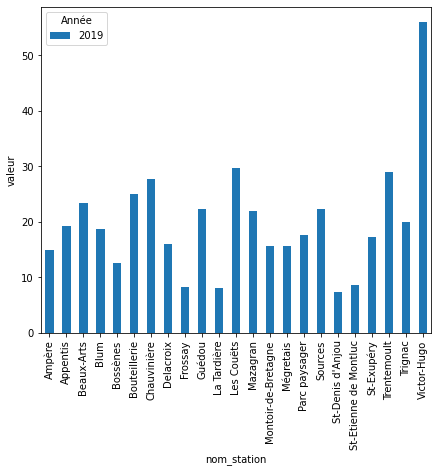

In [28]:
ax = df_pivot.plot(kind="bar")
# Get a Matplotlib figure from the axes object for formatting purposes
fig = ax.get_figure()
# Change the plot dimensions (width, height)
fig.set_size_inches(7, 6)
# Change the axes labels
ax.set_xlabel("nom_station")
ax.set_ylabel("valeur")
# Use this to show the plot in a new window
plt.show()
# Export the plot as a PNG file
# fig.savefig("page_views_barplot.png")

In [29]:
NO2_MOYENNE_ANNUELLE_2019 = """SELECT MS.code_station AS CS, nom_station, Année, AVG(valeur) AS Moyenne_ANNUELLE
FROM mesures_journalieres MS
LEFT JOIN localisation L
ON CS = L.code_station 
WHERE polluant = 'NO2' AND Année = '2019'
GROUP BY CS, Année;
"""

In [30]:
NO2_MOYENNE_ANNUELLE_2019 = pd.read_sql_query(NO2_MOYENNE_ANNUELLE_2019, conn)

In [31]:
NO2_MOYENNE_ANNUELLE_2019.head(2)

,CS,nom_station,Année,Moyenne_ANNUELLE
0,1,Ampère,2019,6.816794
1,3,Mégretais,2019,7.181818


In [32]:
NO2_MOYENNE_ANNUELLE_2020 = """SELECT MS.code_station AS CS, nom_station, Année, AVG(valeur) AS Moyenne_ANNUELLE
FROM mesures_journalieres MS
LEFT JOIN localisation L
ON CS = L.code_station 
WHERE polluant = 'NO2' AND Année = '2020'
GROUP BY CS, Année;
"""

In [33]:
NO2_MOYENNE_ANNUELLE_2020 = pd.read_sql_query(NO2_MOYENNE_ANNUELLE_2020, conn)

In [34]:
NO2_MOYENNE_ANNUELLE_2020.head(2)

,CS,nom_station,Année,Moyenne_ANNUELLE
0,1,Ampère,2020,6.502732
1,3,Mégretais,2020,6.794521


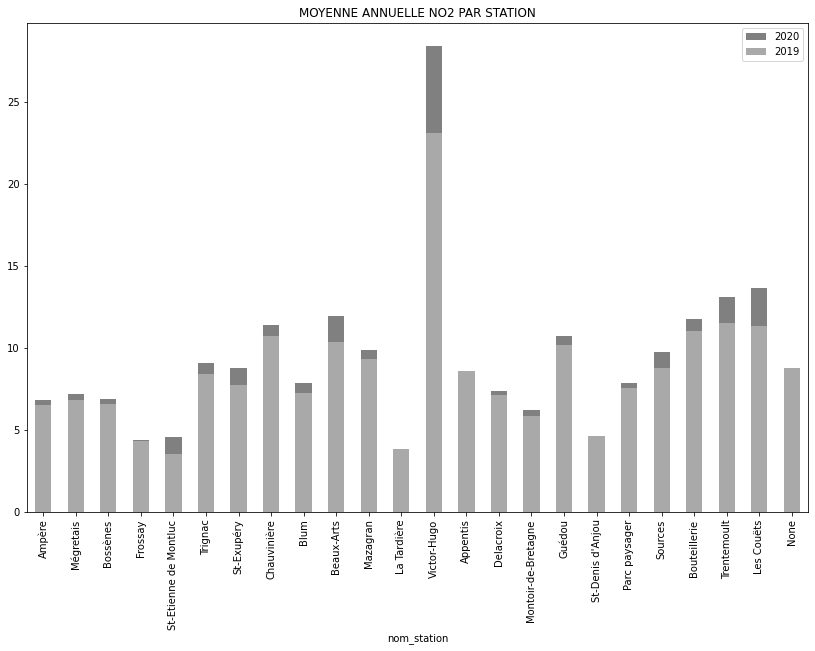

In [35]:
plt.figure(figsize = [14,9])
plt.title("MOYENNE ANNUELLE NO2 PAR STATION")
ax = plt.gca()
NO2_MOYENNE_ANNUELLE_2019.plot(kind='bar',x='nom_station',y='Moyenne_ANNUELLE', color='grey', ax=ax)
NO2_MOYENNE_ANNUELLE_2020.plot(kind='bar',x='nom_station',y='Moyenne_ANNUELLE', color='darkgrey', ax=ax)
ax.legend(['2020', '2019'])
fig = ax.get_figure()
fig.savefig("MOYENNE_ANNUELLE_NO2_PAR_STATION.png")
plt.show()

In [36]:
NO2_Mars2019 = """
    SELECT * 
    FROM mesures_journalieres
    LEFT JOIN localisation L
        ON mesures_journalieres.code_station = L.code_station
    WHERE date BETWEEN '2019-03-17' AND '2019-05-11' AND statut_valid = 1 AND polluant = 'NO2'
    ;
"""

In [37]:
data_NO2_2019 = pd.read_sql_query(NO2_Mars2019, conn)

In [38]:
data_NO2_2019.head()

,code_station,polluant,valeur,unite,date,Année,Mois,statut_valid,code_station,nom_departement,nom_com,code_insee_com,nom_station,typologie,x_reglementaire,y_reglementaire
0,120,NO2,8.0,microg/m3,2019-03-17,2019,3,1,120,Maine-et-Loire,Angers,49007,Beaux-Arts,urban,432231.149205,6.713601e+06
1,120,NO2,15.0,microg/m3,2019-03-18,2019,3,1,120,Maine-et-Loire,Angers,49007,Beaux-Arts,urban,432231.149205,6.713601e+06
2,120,NO2,28.0,microg/m3,2019-03-19,2019,3,1,120,Maine-et-Loire,Angers,49007,Beaux-Arts,urban,432231.149205,6.713601e+06
3,120,NO2,31.0,microg/m3,2019-03-20,2019,3,1,120,Maine-et-Loire,Angers,49007,Beaux-Arts,urban,432231.149205,6.713601e+06
4,120,NO2,17.0,microg/m3,2019-03-21,2019,3,1,120,Maine-et-Loire,Angers,49007,Beaux-Arts,urban,432231.149205,6.713601e+06


In [39]:
NO2_Mars2020 = """
    SELECT * 
    FROM mesures_journalieres
    LEFT JOIN localisation L
        ON mesures_journalieres.code_station = L.code_station
    WHERE date BETWEEN '2020-03-17' AND '2020-05-11' AND statut_valid = 1 AND polluant = 'NO2'
    ;
"""

In [40]:
data_NO2_2020 = pd.read_sql_query(NO2_Mars2020, conn)

In [41]:
data_NO2_2020.head()

,code_station,polluant,valeur,unite,date,Année,Mois,statut_valid,code_station,nom_departement,nom_com,code_insee_com,nom_station,typologie,x_reglementaire,y_reglementaire
0,152,NO2,7.0,microg/m3,2020-03-17,2020,3,1,152,Vendée,La Roche-sur-Yon,85191,Delacroix,urban,360919.202113,6.627370e+06
1,152,NO2,8.0,microg/m3,2020-03-18,2020,3,1,152,Vendée,La Roche-sur-Yon,85191,Delacroix,urban,360919.202113,6.627370e+06
2,152,NO2,8.0,microg/m3,2020-03-19,2020,3,1,152,Vendée,La Roche-sur-Yon,85191,Delacroix,urban,360919.202113,6.627370e+06
3,152,NO2,5.0,microg/m3,2020-03-20,2020,3,1,152,Vendée,La Roche-sur-Yon,85191,Delacroix,urban,360919.202113,6.627370e+06
4,152,NO2,5.0,microg/m3,2020-03-21,2020,3,1,152,Vendée,La Roche-sur-Yon,85191,Delacroix,urban,360919.202113,6.627370e+06


In [42]:
df_pivot = pd.pivot_table(
    Periode_conf_NO2, 
    values="valeur",
    index="Année",
    columns="Mois", 
    aggfunc=np.mean
)

In [43]:
df_pivot2 = pd.pivot_table(
    Periode_conf_NO2, 
    values="valeur",
    index="Année",
    columns="nom_station", 
    aggfunc=np.mean
)

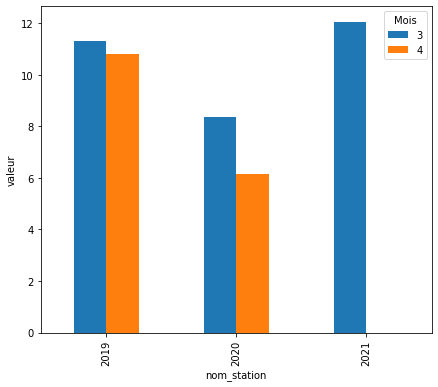

In [44]:
ax = df_pivot.plot(kind="bar")
# Get a Matplotlib figure from the axes object for formatting purposes
fig = ax.get_figure()
# Change the plot dimensions (width, height)
fig.set_size_inches(7, 6)
# Change the axes labels
ax.set_xlabel("nom_station")
ax.set_ylabel("valeur")
# Use this to show the plot in a new window
plt.show()
# Export the plot as a PNG file
# fig.savefig("page_views_barplot.png")

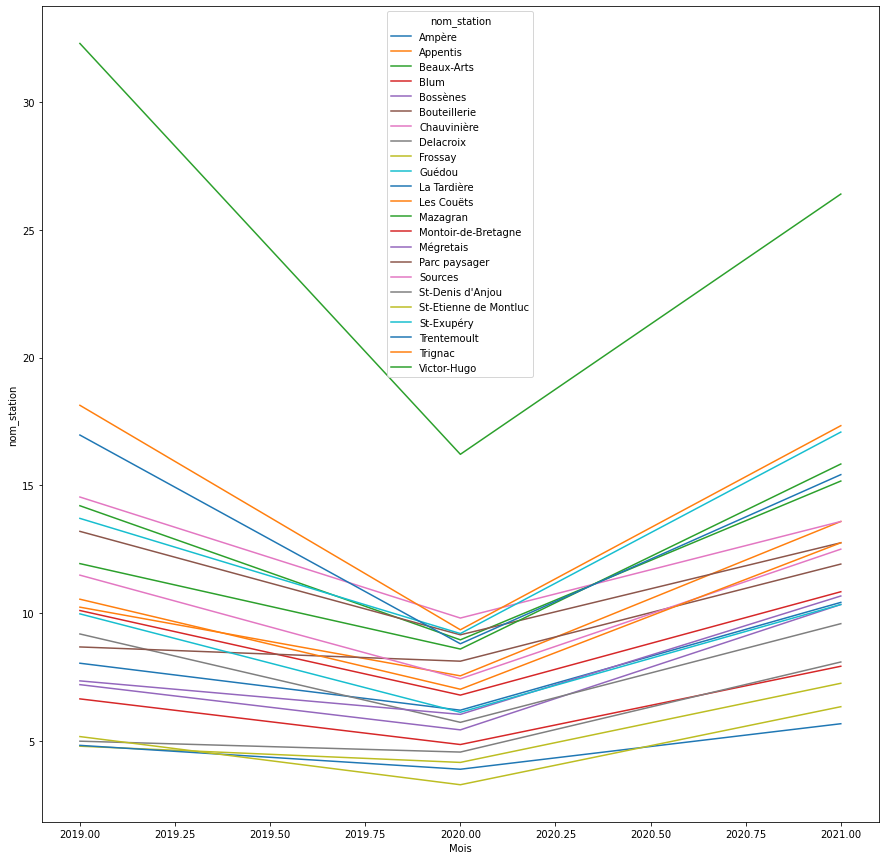

In [45]:
ax = df_pivot2.plot(kind="line")
# Get a Matplotlib figure from the axes object for formatting purposes
fig = ax.get_figure()
# Change the plot dimensions (width, height)
fig.set_size_inches(15, 15)
# Change the axes labels
ax.set_xlabel("Mois")
ax.set_ylabel("nom_station")
# Use this to show the plot in a new window
plt.show()
# Export the plot as a PNG file
# fig.savefig("page_views_barplot.png")

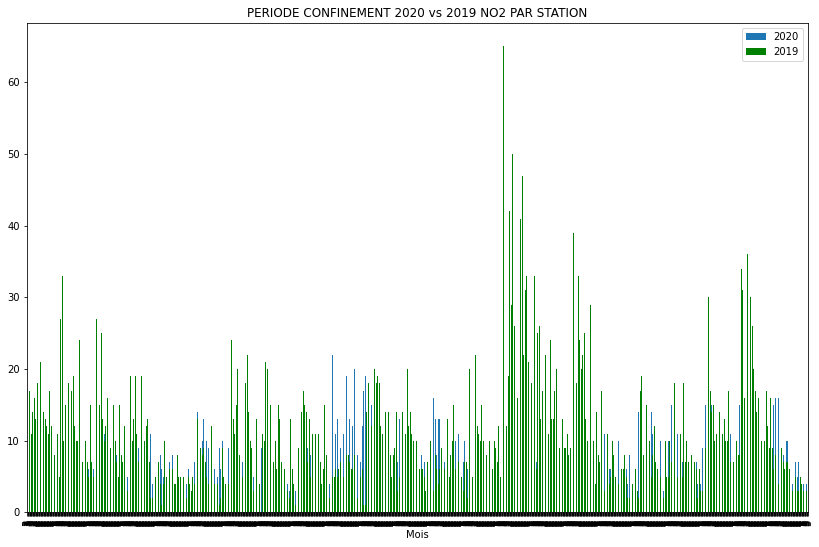

In [46]:
plt.figure(figsize = [14,9])
plt.title("PERIODE CONFINEMENT 2020 vs 2019 NO2 PAR STATION")
ax = plt.gca()
data_NO2_2020.plot(kind='bar',x='Mois',y='valeur', ax=ax)
data_NO2_2019.plot(kind='bar',x='Mois',y='valeur', color='green', ax=ax)
ax.legend(['2020', '2019'])
plt.show()

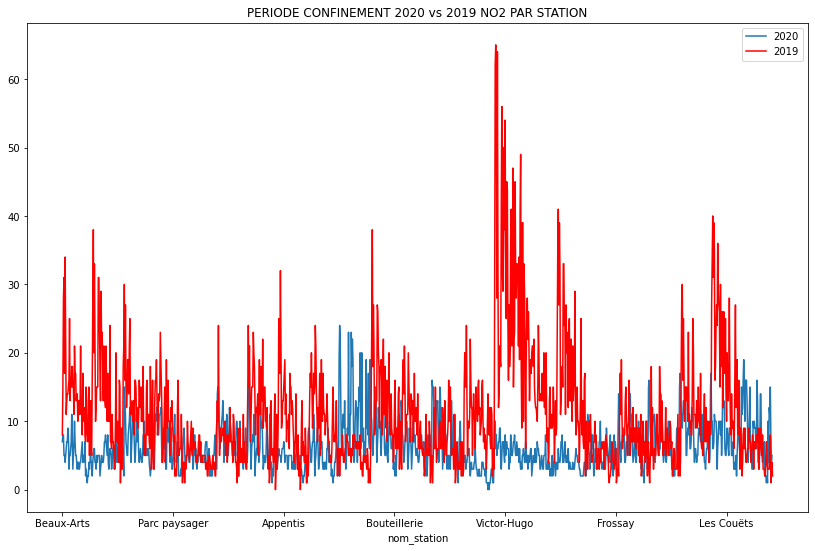

In [47]:
plt.figure(figsize = [14,9])
plt.title("PERIODE CONFINEMENT 2020 vs 2019 NO2 PAR STATION")
ax = plt.gca()
hue='valeur'
data_NO2_2020.plot(kind='line',x='nom_station',y='valeur',ax=ax)
data_NO2_2019.plot(kind='line',x='nom_station',y='valeur', color='red', ax=ax)
ax.legend(['2020', '2019'])
plt.show()

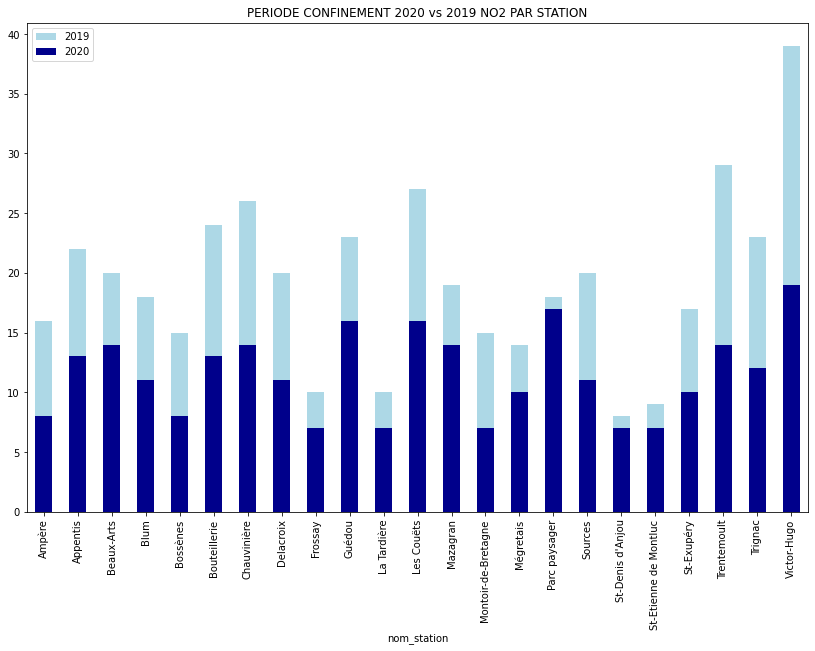

In [48]:
# Méthode .figure pour définir de la taille du graphique
plt.figure(figsize = [14,9])
plt.title("PERIODE CONFINEMENT 2020 vs 2019 NO2 PAR STATION")
ax = plt.gca()
data_NO2_2019.groupby('nom_station')['valeur'].nunique().plot(kind='bar', color='lightblue', ax=ax)
data_NO2_2020.groupby('nom_station')['valeur'].nunique().plot(kind='bar', color='darkblue', ax=ax)
ax.legend(['2019', '2020'])
plt.show()

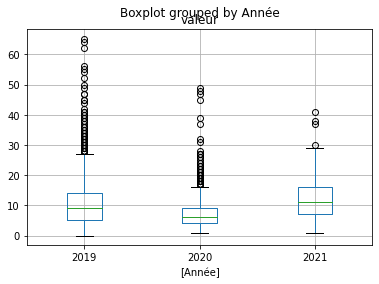

In [49]:
Periode_conf_NO2.boxplot(column=['valeur'], by=['Année'])
plt.show()

In [50]:
NO2_Mars2019_15 = """
    SELECT * 
    FROM mesures_journalieres
    LEFT JOIN localisation L
        ON mesures_journalieres.code_station = L.code_station
    WHERE date BETWEEN '2019-03-01' AND '2019-04-30' AND statut_valid = 1 AND polluant = 'NO2'
    GROUP BY date
    ;
"""

In [51]:
NO2_Mars2019_15 = pd.read_sql_query(NO2_Mars2019_15, conn)

In [52]:
NO2_Mars2019_15.head()

,code_station,polluant,valeur,unite,date,Année,Mois,statut_valid,code_station,nom_departement,nom_com,code_insee_com,nom_station,typologie,x_reglementaire,y_reglementaire
0,120,NO2,18.0,microg/m3,2019-03-01,2019,3,1,120,Maine-et-Loire,Angers,49007,Beaux-Arts,urban,432231.149205,6.713601e+06
1,120,NO2,10.0,microg/m3,2019-03-02,2019,3,1,120,Maine-et-Loire,Angers,49007,Beaux-Arts,urban,432231.149205,6.713601e+06
2,120,NO2,5.0,microg/m3,2019-03-03,2019,3,1,120,Maine-et-Loire,Angers,49007,Beaux-Arts,urban,432231.149205,6.713601e+06
3,120,NO2,9.0,microg/m3,2019-03-04,2019,3,1,120,Maine-et-Loire,Angers,49007,Beaux-Arts,urban,432231.149205,6.713601e+06
4,120,NO2,14.0,microg/m3,2019-03-05,2019,3,1,120,Maine-et-Loire,Angers,49007,Beaux-Arts,urban,432231.149205,6.713601e+06


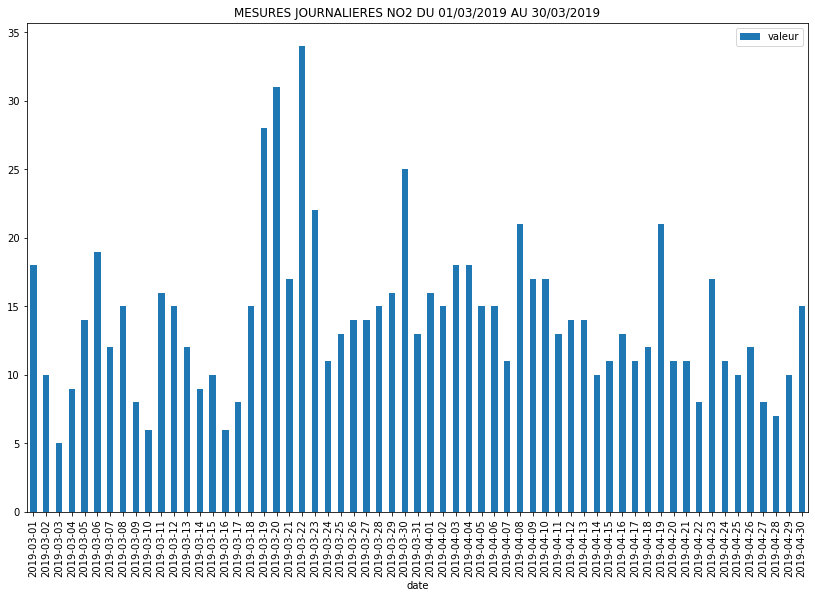

In [53]:
plt.figure(figsize = [14,9])
plt.title("MESURES JOURNALIERES NO2 DU 01/03/2019 AU 30/03/2019")
ax = plt.gca()
NO2_Mars2019_15.plot(kind='bar',x='date',y='valeur', ax=ax)
plt.show()

In [54]:
conn.close()